### `Putting it all together: Building a value-weighted index`
#### `01:Explore and clean company listing information`
To get started with the construction of a market-value based index, you'll work with the combined listing info for the three largest US stock exchanges, the NYSE, the NASDAQ and the AMEX.

In this and the next exercise, you will calculate market-cap weights for these stocks.

We have already imported pandas as pd, and loaded the listings data set with listings information from the NYSE, NASDAQ, and AMEX. The column 'Market Capitalization' is already measured in USD mn.


- Inspect `listings` using `.info()`.
- Move the column `'Stock Symbol'` into the index (`inplace`).
- Drop all companies with missing `'Sector'` information from `listings`.
- Select companies with IPO Year before 2019.
- Inspect the result of the changes you just made using `.info()`.
- Show the number of companies per `'Sector'` using `.groupby()` and `.size()`. Sort the output in descending order.

In [23]:
import pandas as pd 

In [24]:
listings = pd.read_excel('datasets/listings_agg.xlsx',  sheet_name=0, index_col=0)
listings

,Exchange,Stock Symbol,Company Name,Last Sale,Market Capitalization,IPO Year,Sector,Industry
0,amex,XXII,"22nd Century Group, Inc",1.33,120.628,NaN,Consumer Non-Durables,Farming/Seeds/Milling
1,amex,FAX,Aberdeen Asia-Pacific Income Fund Inc,5.00,1266.333,1986.0,NaN,NaN
2,amex,IAF,Aberdeen Australia Equity Fund Inc,6.15,139.865,NaN,NaN,NaN
3,amex,CH,"Aberdeen Chile Fund, Inc.",7.22,67.563,NaN,NaN,NaN
4,amex,ABE,Aberdeen Emerging Markets Smaller Company Oppo...,13.36,128.843,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
66,69 nyse,ZB^H,Zions Bancorporation,25.30,0.000,NaN,NaN,NaN
66,70 nyse,ZBK,Zions Bancorporation,28.86,0.000,NaN,Finance,Major Banks
66,71 nyse,ZOES,"Zoe&#39;s Kitchen, Inc.",17.07,332.556,2014.0,Consumer Services,Restaurants
66,72 nyse,ZTS,Zoetis Inc.,53.10,26105.443,2013.0,Health Care,Major Pharmaceuticals


In [25]:
# Inspect listings
print(listings.info())

# Move 'stock symbol' into the index
listings.set_index('Stock Symbol', inplace=True)

# Drop rows with missing 'sector' data
listings.dropna(subset=['Sector'], inplace=True)


# Select companies with IPO Year before 2019
listings = listings[listings["IPO Year"] < 2019]

# Inspect the new listings data
print(listings.info())

# Show the number of companies per sector
print(listings.groupby('Sector').size().sort_values(ascending=False))


<class 'pandas.core.frame.DataFrame'>
Int64Index: 6674 entries, 0 to 66
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Exchange               6674 non-null   object 
 1   Stock Symbol           6674 non-null   object 
 2   Company Name           6674 non-null   object 
 3   Last Sale              6590 non-null   float64
 4   Market Capitalization  6674 non-null   float64
 5   IPO Year               2852 non-null   float64
 6   Sector                 5182 non-null   object 
 7   Industry               5182 non-null   object 
dtypes: float64(3), object(5)
memory usage: 469.3+ KB
None
<class 'pandas.core.frame.DataFrame'>
Index: 2349 entries, ACU to ZTO
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Exchange               2349 non-null   object 
 1   Company Name           2349 non-null   object 
 2   La

In [26]:
listings.groupby('Sector').size().sort_values(ascending=False)

Sector
Health Care              445
Consumer Services        402
Technology               386
Finance                  351
Energy                   144
Capital Goods            143
Public Utilities         104
Basic Industries         104
Consumer Non-Durables     89
Miscellaneous             68
Transportation            58
Consumer Durables         55
dtype: int64

#### `02: Select and inspect index components`

Now that you have imported and cleaned the listings data, you can proceed to select the index components as the largest company for each sector by market capitalization.

You'll also have the opportunity to take a closer look at the components, their last market value, and last price.


We have already imported `pandas` as `pd`, and loaded the `listings` data with the modifications you made during the last exercise.

- Use `.groupby()` and `.nlargest()` to select the largest company by `'Market Capitalization'` for each `'Sector'`, and assign the result to `components`.
- Print `components`, sorted in descending order by market cap.
- Select `Stock Symbol` from the `index` of `components`, assign it to `tickers` and print the result.
- Create a list `info_cols` that holds the column names `Company Name`, `Market Capitalization`, and `Last Sale`. Next, use `.loc[]` with `tickers` and `info_cols` to `print()` more details about the listings sorted in descending order by `Market Capitalization`)

In [27]:
listings = pd.read_csv('datasets/listings_1.csv',index_col=0)
listings

,Exchange,Company Name,Last Sale,Market Capitalization,IPO Year,Sector,Industry
Stock Symbol,,,,,,,
ACU,amex,Acme United Corporation.,27.39,91.14,1988,Capital Goods,Industrial Machinery/Components
ROX,amex,"Castle Brands, Inc.",1.46,237.64,2006,Consumer Non-Durables,Beverages (Production/Distribution)
CQP,amex,"Cheniere Energy Partners, LP",32.70,11046.92,2007,Public Utilities,Oil/Gas Transmission
CIX,amex,CompX International Inc.,14.35,178.21,1998,Capital Goods,Industrial Machinery/Components
GSAT,amex,"Globalstar, Inc.",1.73,1931.55,2006,Consumer Services,Telecommunications Equipment
...,...,...,...,...,...,...,...
WNS,nyse,WNS (Holdings) Limited,28.95,1445.92,2006,Miscellaneous,Business Services
XRM,nyse,"Xerium Technologies, Inc.",6.34,102.41,2005,Basic Industries,Textiles
XIN,nyse,Xinyuan Real Estate Co Ltd,4.28,281.25,2007,Basic Industries,Homebuilding


In [28]:
# Select largest company for each sector
components = listings.groupby(['Sector'])['Market Capitalization'].nlargest(1)

# Print components, sorted by market cap
print(components.sort_values(ascending=False))

# Select stock symbols and print the result
tickers = components.index.get_level_values('Stock Symbol')
print(tickers)

# Print company name, market cap, and last price for each component 
info_cols = ['Company Name', 'Market Capitalization', 'Last Sale']
print(listings.loc[tickers, info_cols].sort_values('Market Capitalization', ascending=False))

Sector                 Stock Symbol
Technology             AAPL            740024.47
Consumer Services      AMZN            422138.53
Miscellaneous          MA              123330.09
Health Care            AMGN            118927.21
Transportation         UPS              90180.89
Finance                GS               88840.59
Basic Industries       RIO              70431.48
Public Utilities       TEF              54609.81
Consumer Non-Durables  EL               31122.51
Capital Goods          ILMN             25409.38
Energy                 PAA              22223.00
Consumer Durables      CPRT             13620.92
Name: Market Capitalization, dtype: float64
Index(['RIO', 'ILMN', 'CPRT', 'EL', 'AMZN', 'PAA', 'GS', 'AMGN', 'MA', 'TEF',
       'AAPL', 'UPS'],
      dtype='object', name='Stock Symbol')
                                    Company Name  Market Capitalization  \
Stock Symbol                                                              
AAPL                                  

#### `03: Import index component price information`
Now you'll use the stock symbols for the companies you selected in the last exercise to calculate returns for each company.

We have already imported `pandas` as `pd` and `matplotlib.pyplot` as `plt` for you. We have also made the variable `tickers` available to you, which contains the `Stock Symbol` for each index component as a `list`.

- Print `tickers` to verify the content matches your result from the last exercise.
  
- Use `pd.read_csv()` to import `'stock_prices.csv'`, parsing the `'Date'` column and also setting the `'Date'` column as index before assigning the -
  
- result to `stock_prices`. Inspect the result using `.info()`.

- Calculate the price return for the index components by dividing the last row of `stock_prices` by the first, subtracting 1 and multiplying by 100. Assign the result to `price_return`.

- Plot a horizontal bar chart of the sorted returns with the title `Stock Price Returns`.

['RIO', 'ILMN', 'CPRT', 'EL', 'AMZN', 'PAA', 'GS', 'AMGN', 'MA', 'TEF', 'AAPL', 'UPS']
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1762 entries, 2010-01-04 to 2016-12-30
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    1761 non-null   float64
 1   AMGN    1761 non-null   float64
 2   AMZN    1761 non-null   float64
 3   CPRT    1761 non-null   float64
 4   EL      1762 non-null   float64
 5   GS      1762 non-null   float64
 6   ILMN    1761 non-null   float64
 7   MA      1762 non-null   float64
 8   PAA     1762 non-null   float64
 9   RIO     1762 non-null   float64
 10  TEF     1762 non-null   float64
 11  UPS     1762 non-null   float64
dtypes: float64(12)
memory usage: 179.0 KB
None


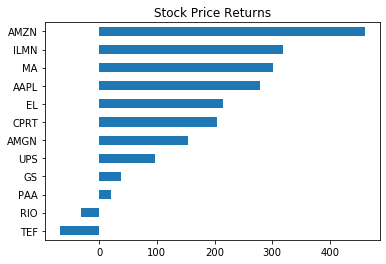

In [30]:
import matplotlib.pyplot as plt 
tickers = ['RIO', 'ILMN', 'CPRT', 'EL', 'AMZN', 'PAA', 'GS', 'AMGN', 'MA', 'TEF', 'AAPL', 'UPS']

# Print tickers
print(tickers)

# Import prices and inspect result
stock_prices = pd.read_csv('datasets/stock_prices.csv', parse_dates=['Date'], index_col='Date')
print(stock_prices.info())

# Calculate the returns
price_return = stock_prices.iloc[-1].div(stock_prices.iloc[0]).sub(1).mul(100)

# Plot horizontal bar chart of sorted price_return   
price_return.sort_values().plot(kind='barh', title='Stock Price Returns')
plt.title('Stock Price Returns')
plt.show()

